In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("C:/Users/C5295630/Documents/DataScience/Assignment/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data = data.drop_duplicates()
data.shape

(45211, 17)

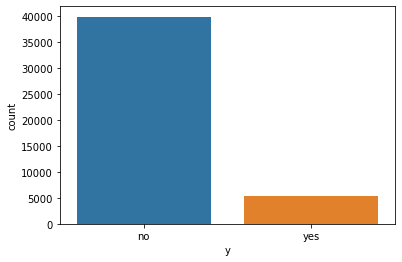

<Figure size 432x288 with 0 Axes>

In [9]:
import seaborn as sns
sns.countplot(x='y',data=data)
fig=plt.figure()

In [10]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [13]:
data['y'].value_counts()/45211 ##percentage for subscription

no     0.883015
yes    0.116985
Name: y, dtype: float64

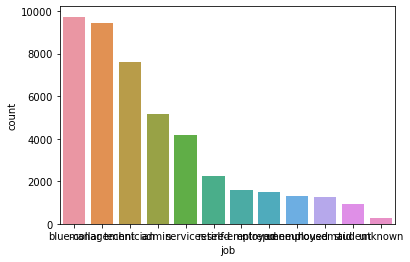

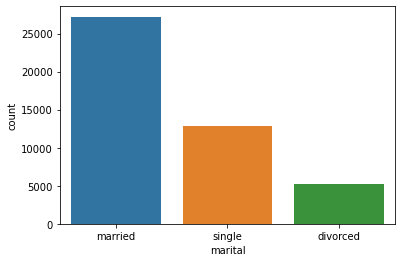

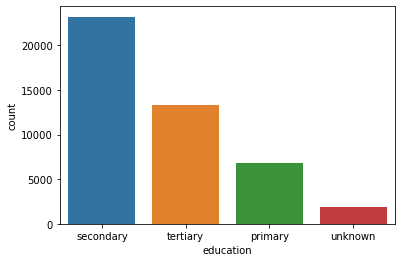

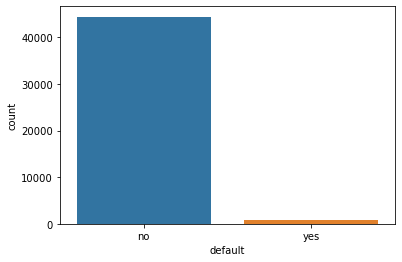

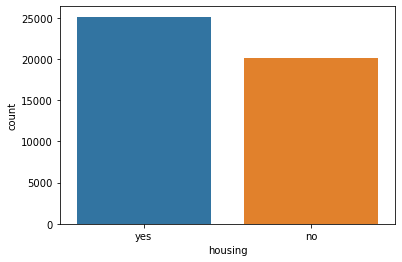

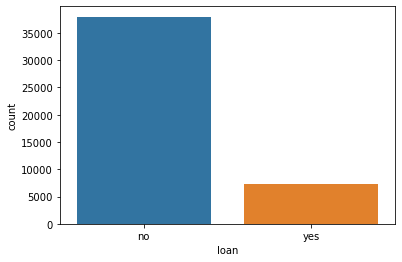

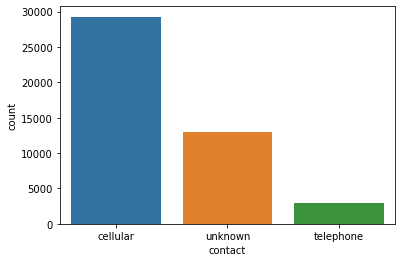

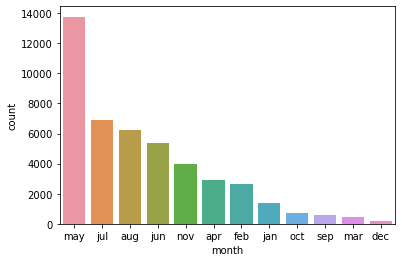

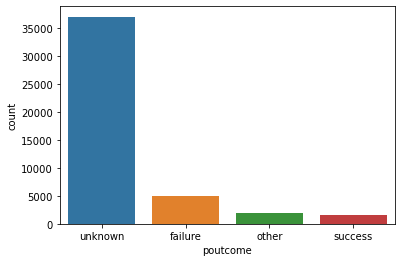

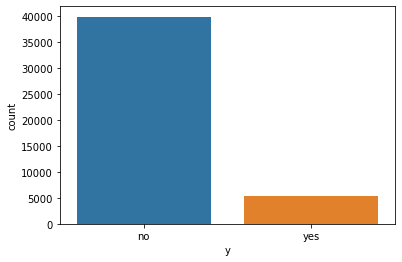

In [15]:
## Barplots for categorcal data
for feature in data.dtypes[data.dtypes == 'object'].index:
    sns.countplot(x = feature, data= data, order = data[feature].value_counts().index)
    plt.show()

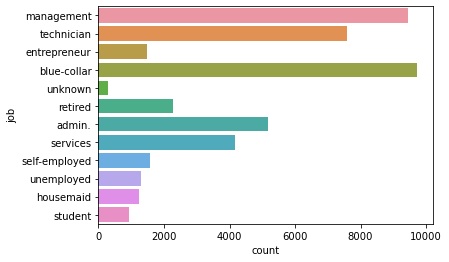

<Figure size 432x288 with 0 Axes>

In [25]:
sns.countplot(y='job',data=data)
fig=plt.figure()

In [16]:
##explore the numerical data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


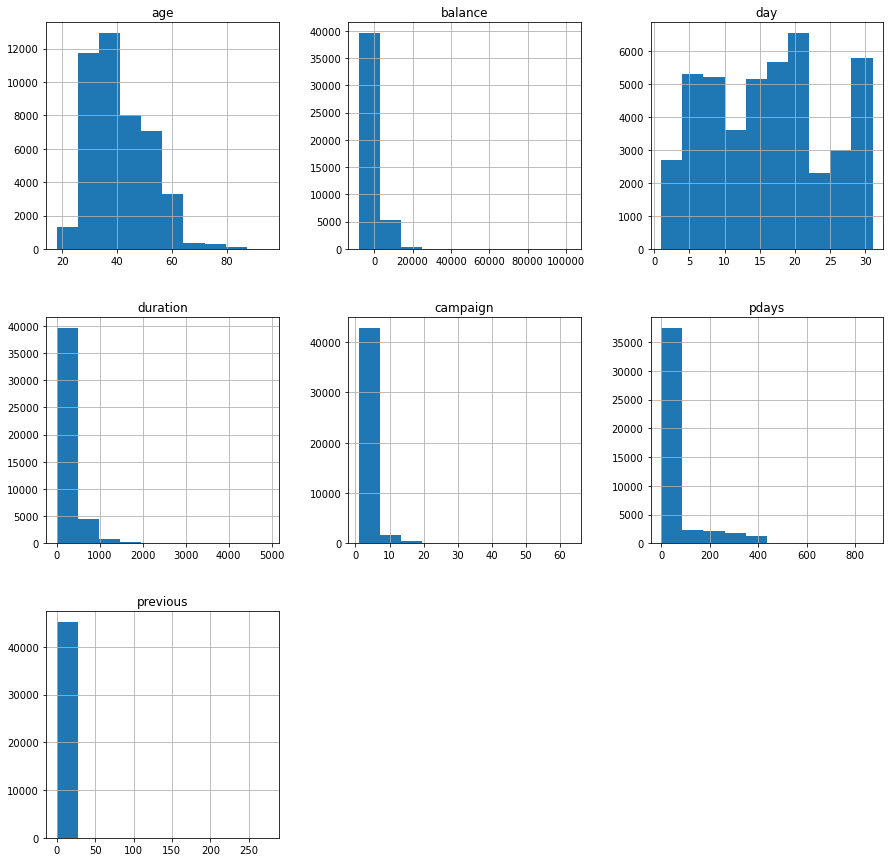

<Figure size 432x288 with 0 Axes>

In [26]:
data.hist(figsize=(15,15)) ##every data is having outliers
fig=plt.figure()

<AxesSubplot:>

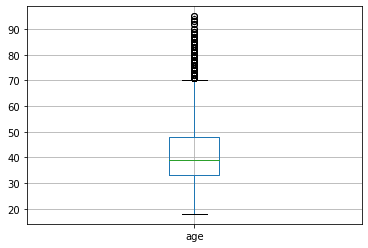

In [18]:
data.boxplot(column=['age'])

<AxesSubplot:>

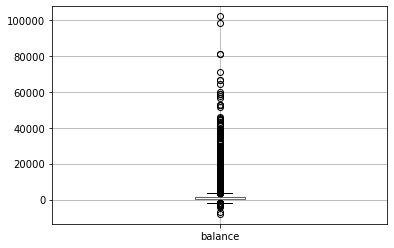

In [19]:
data.boxplot(column=['balance'])

<AxesSubplot:>

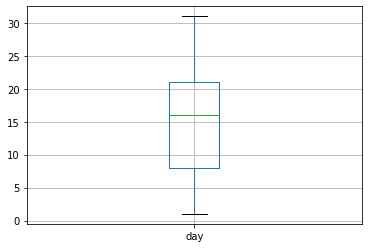

In [20]:
data.boxplot(column=['day'])

<AxesSubplot:>

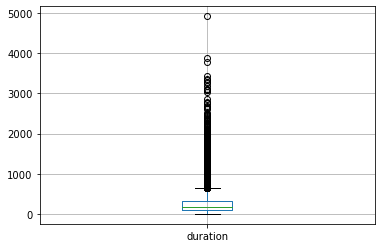

In [21]:
data.boxplot(column=['duration'])

<AxesSubplot:>

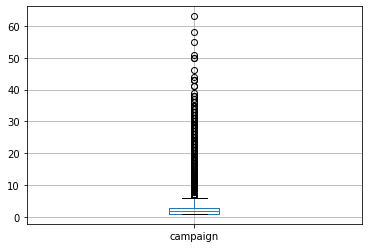

In [22]:
data.boxplot(column=['campaign'])

<AxesSubplot:>

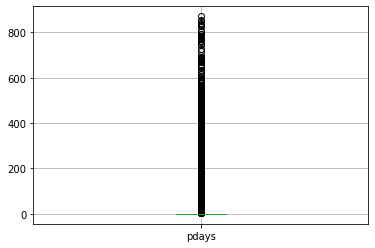

In [23]:
data.boxplot(column=['pdays'])

<AxesSubplot:>

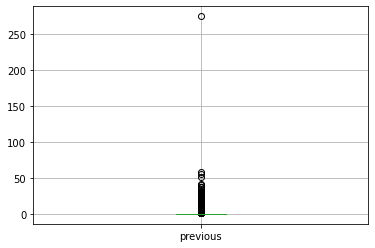

In [24]:
data.boxplot(column=['previous'])

In [27]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
data = data.dropna()

In [39]:
# encoding the categorical variables
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

encoder = preprocessing.LabelEncoder()
data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['poutcome'] = encoder.fit_transform(data['poutcome'])
data['y'] = encoder.fit_transform(data['y'])
data['contact'] = encoder.fit_transform(data['contact'])
data['month'] = encoder.fit_transform(data['month'])

In [40]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [41]:
del data['default']

In [42]:
del data['contact']

In [44]:
data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,2,1,1,5,8,76,1,-1,0,3,0
3,47,1,1,3,1506,1,0,5,8,92,1,-1,0,3,0
4,33,11,2,3,1,0,0,5,8,198,1,-1,0,3,0


In [47]:
x = data.iloc[:,0:14]
y = data.iloc[:,14]

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\C5295630\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = classifier.predict(x)

In [52]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [53]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [54]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39180   742]
 [ 4353   936]]


In [56]:
((39180+936)/(39180+742+4353+936))

0.8873061865475216

In [55]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

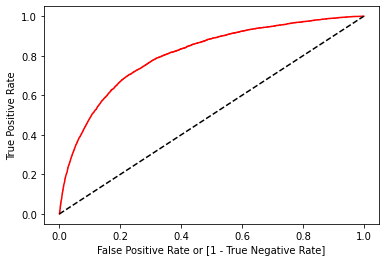

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [58]:
auc

0.5791924144310561